# Luke Lawn, Oriana McDonough & Ryan Pike (Group 14)
Reviewing Instructor: Angela Ramnarine-Rieks

Project Overview: Our project will take the top listened artists from a user’s Spotify account and return concerts and venues where that artist is scheduled to perform. This will save people time and allow them to easily see the artists they love listening to performing live, where they can then purchase concert tickets if they choose to. Our goal is to provide users a new way to preview which shows and events they may want to attend based on their personalized listening history. 

Inputs: Spotify account username

Outputs: Concert tickets options (price, date, time) and venue information (location, contact information) for top listened artists

Algorithm: 
- Import Spotify API and TicketMaster API 
- User inputs their Spotify account username 
- Create a list of the user’s top 10 listened artists 
- For each artist in the list, find upcoming concerts and venue information 
- Print the above

# Link to Video and Poster
Poster:
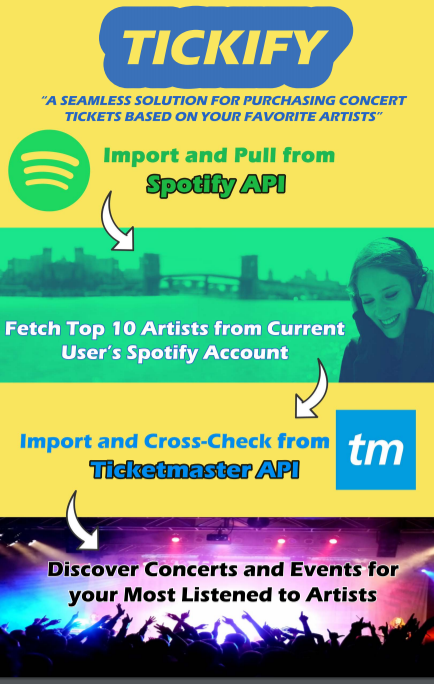
Video: 
- https://www.youtube.com/watch?v=cNV3VAt819k&feature=youtu.be

# Code Explained:
The program that we wrote required us to utilize two different API's. In order to use these API’s we needed to register accounts and applications with both Spotify and Ticketmaster. Registering an application with our Spotify account allowed us to gain access to the functions we needed to request information from private Spotify accounts. Spotify gave us a client ID and secret ID to grant access to users’ information which we used to request data and form that data into a list. We then took that list and used the Ticketmaster API to return links to the top_artists list’s Ticketmaster event pages.

Input:
Spotify Account credentials

Output:
Dataframe of top listened artists & Ticketmaster links in 2 columns

Algorithm:

- Import modules spotipy, ticketpy, pprint, sys, json, pandas, requests, csv and urllib
- Program takes token from application and authenticates with current user's credentials
- Define the scope for the API and the username
- Refine top artists to a list of 10 and name it top_artists
- Using ticketpy, find a URL linking to information for top_artists show information, prices and venues.
- Create a csv file and import the url's and top_artists into two columns
- Make a dataframe for the file and print it


# Who Did What?

Code:
- Spotify Research: Oriana
- Spotify Implementation: Luke

- TicketMaster Research: Oriana
- TicketMaster Implementation: Ryan

Poster:
- Oriana

Video Script:
- Oriana

Filming: 
- All

Write-Ups/Proposal:
- All

Code Explanation: 
- Luke

Who Did What?: 
- Ryan


In [12]:
import pprint
import sys
import spotipy #Spotify
import spotipy.util as util #Spotify
import json
import pandas as pd
import ticketpy #TicketMaster
import requests
import csv
import urllib

x = 0 #Count Variable
y = 0 #Count Variable

top_artists = [] #Used to store Spotify Top Artists
artists = [] #Used to store TicketMaster Artist Names
urllist = [] #Used to store TicketMaster URLs
df = pd.DataFrame() #Used to output data in DataFrame

def make_clickable(val):                                                 #Function to make URLs in DataFrame clickable
    return '<a href="{}">{}</a>'.format(val,val)

scope = 'user-top-read'                                                  #Setting scope to authorize API access to user information
    
if len(sys.argv) > 1:                                                    #Setting username for Spotify token authorization
    username = sys.argv[1]                                               # Checks for sys arguments and defines username for current user
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id='69d411268d5d47c7adc4dc6868928548',client_secret='db95e59f1fa242d28a897684312a85e6',redirect_uri='https://accounts.spotify.com/api/token')

if token:                               
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['medium_term']                                                #Spotify offers short, medium, and long term data
    for range in ranges:
        results = sp.current_user_top_artists(time_range=range, limit=10)   #Limiting results to 10 for established range of data
        for i, item in enumerate(results['items']):                         #For all Artists in Results
            top_artists.append(item['name'])                                #Add 10 Artists to list

else:
    print("Can't get token for", username)                                 # Error msg if token authentication does not work

for t in top_artists:                                                      #For every item in the list of artists
    url = 'https://app.ticketmaster.com/discovery/v2/attractions.json?countryCode=US&classificationName=music&apikey=QQJB3jgFw4OyEe77Y7OGGsFGfqQ0f0hM&keyword=' #TicketMaster API query
    url = url + urllib.parse.quote_plus(top_artists[y])                    #Adding individual Artist Names to the end of the TicketMaster API query
    response = requests.get(url)                                           #Run API query
    attractions = response.json()                                          #Attractions = decoded json from query
    artists.append(attractions['_embedded']['attractions'][0]['name'])     #Add Artist Name from TicketMaster to list
    urllist.append(attractions['_embedded']['attractions'][0]['url'])      #Add Artist TicketMaster URL to List
    y = y + 1                                                              #Add to count variable

with open('tickify.csv', 'w') as csvfile:                                  #Create a new CSV file
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)#Write to CSV
    filewriter.writerow(['Artist', 'TicketMaster URL'])                    #Add Artist and TicketMaster URL as column headers
    for a in artists:                                                      #For each item in list
        filewriter.writerow([artists[x], urllist[x]])                      #Add Artist Name and URL as a row
        x = x + 1                                                          #Add to count variable
        
df = pd.read_csv('tickify.csv')                                            #Read CSV file as a DataFrame

df.style.format(make_clickable, subset=pd.IndexSlice[:, ['TicketMaster URL']])#Output formatted CSV file to have URL's as clickable


,Artist,TicketMaster URL
0,Lil Uzi Vert,http://www.ticketmaster.com/artist/2119391
1,A$ap Mob,http://www.ticketmaster.com/artist/1756359
2,Kodak Black,http://www.ticketmaster.com/artist/2241265
3,Travis Scott,http://www.ticketmaster.com/artist/1788754
4,Gucci Mane,http://www.ticketmaster.com/artist/1016779
5,Meek Mill,http://www.ticketmaster.com/artist/1599551
6,Sublime with Rome,http://www.ticketmaster.com/artist/1417095
7,21 Savage,http://www.ticketmaster.com/artist/2181837
8,Drake,http://www.ticketmaster.com/artist/1319371
9,2 Chainz,http://www.ticketmaster.com/artist/1615064
